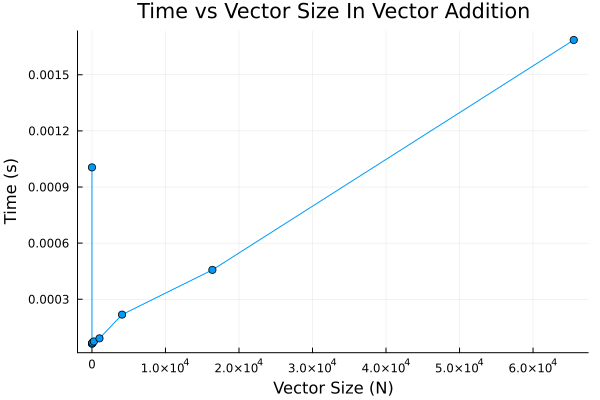

In [16]:
using CUDA
using Plots
N = [2,2^2,2^4,2^6,2^8,2^10,2^12,2^14,2^16]; # creating a N using powers of 2
Time = zeros(Float64, length(N))
for i in eachindex(N)
    a = N[i];
    x_1d = CUDA.randn(Float64, a, 1); # create a random vector using random function in CUDA
    y_1d = CUDA.randn(Float64, a, 1);
    Time[i] = @elapsed  CUDA.@sync x_1d.+ y_1d; # record the time, and ensure the cpu times the gpu by using @sync 
end

plot(N, Time, title="Time vs Vector Size In Vector Addition", xlabel="Vector Size (N)", ylabel="Time (s)",legend=false, marker=:circle)


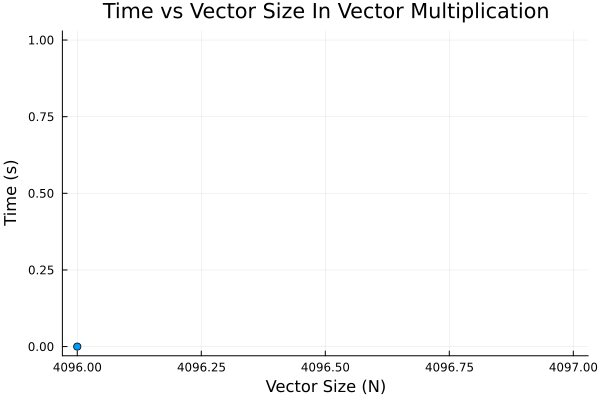

In [18]:
using CUDA
using Plots
using BenchmarkTools
#N = [2^8, 2^9, 2^10, 2^11, 2^12, 2^13, 2^14, 2^15, 2^16]; # creating a N using powers of 2
N = [2^12];
Time = zeros(Float64, length(N))
for i in eachindex(N)
    a = N[i];
    x_1d = CUDA.randn(Float64, a, 1); # create a random vector using random function in CUDA
    y_1d = CUDA.randn(Float64, a, 1);
    @benchmark CUDA.@sync $x_1d'* $y_1d
    #@btime CUDA.@sync $x_1d'* $y_1d;
end

plot(N, Time, title="Time vs Vector Size In Vector Multiplication", xlabel="Vector Size (N)", ylabel="Time (s)",legend=false, marker=:circle)


In [1]:
using CUDA
using Plots
using BenchmarkTools
N = [2^8, 2^9, 2^10, 2^11, 2^12, 2^13, 2^14]; # creating a N using powers of 2, while 
Time = zeros(Float64, length(N))
for i in eachindex(N)
    a = N[i];
    x_2d = CUDA.randn(Float64, a, a);
    y_2d = CUDA.randn(Float64, a, a);
    Time[i] = @btime  CUDA.@sync x_2d.* y_2d;
end

#plot(N, Time, title="Time vs Vector Size In Matirces Multiplication", xlabel="Vector Size (N)", ylabel="Time (s)",legend=false, marker=:circle)
plot(N, Time, title="Time vs Vector Size In Matirces Multiplication", xlims=(0, 2E4), ylims=(0, 1), label="Data", marker=:circle, legend=:topright)

LoadError: UndefVarError: `x_2d` not defined

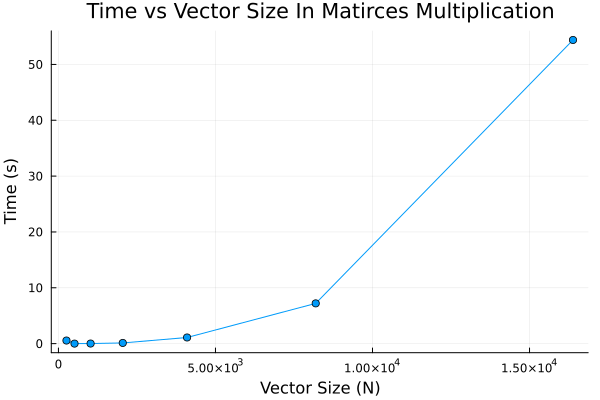

In [26]:
using Plots
N = [2^8, 2^9, 2^10, 2^11, 2^12, 2^13, 2^14]; # creating a N using powers of 2, while 
Time = zeros(Float64, length(N))
for i in eachindex(N)
    a = N[i];
    x_2dC = randn(Float64, a, a);
    y_2dC = randn(Float64, a, a);
    TimeC[i] = @elapsed x_2d* y_2d;
end

plot(N, Time, title="Time vs Vector Size In Matirces Multiplication", xlabel="Vector Size (N)", ylabel="Time (s)",legend=false, marker=:circle)